      X
0    34
1    54
2    23
3    23
4    54
5    67
6    34
7    12
8    76
9    89
10   56
11   33
12   23
13   18
14   32
15   52
16   21
17   21
18   52
19   65
20   32
21   10
22   74
23   87
24   54
25   31
26   21
27   16
28   37
29   57
30   26
31   26
32   57
33   70
34   37
35   15
36   79
37   92
38   59
39   36
40   26
41   21
42   51
43   71
44   40
45   40
46   71
47   84
48   51
49   29
50   93
51  106
52   73
53   50
54   40
55   35


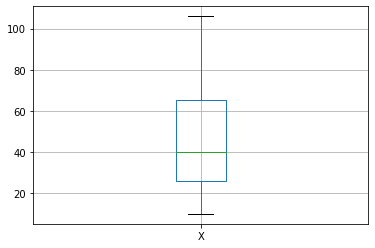

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import chi2

data = pd.read_excel('data.xlsx', sheet_name = 'Sheet4')
data.boxplot()
print(data)


In [8]:
data = pd.read_excel('data.xlsx', sheet_name = 'Sheet4')
z=stats.zscore(data)
print (z)

threshold = 3
c=0
print("\n Outliers:")
for i in range(0,len(z)):
    if z[i] > threshold:
        print(z[i])
        c=1
if c == 0:
    print("No outliers")

[[-0.54644398]
 [ 0.28964517]
 [-1.006293  ]
 [-1.006293  ]
 [ 0.28964517]
 [ 0.83310311]
 [-0.54644398]
 [-1.46614203]
 [ 1.20934322]
 [ 1.75280117]
 [ 0.37325408]
 [-0.58824843]
 [-1.006293  ]
 [-1.21531529]
 [-0.63005289]
 [ 0.20603625]
 [-1.08990192]
 [-1.08990192]
 [ 0.20603625]
 [ 0.7494942 ]
 [-0.63005289]
 [-1.54975095]
 [ 1.12573431]
 [ 1.66919225]
 [ 0.28964517]
 [-0.67185735]
 [-1.08990192]
 [-1.2989242 ]
 [-0.4210306 ]
 [ 0.41505854]
 [-0.88087963]
 [-0.88087963]
 [ 0.41505854]
 [ 0.95851648]
 [-0.4210306 ]
 [-1.34072866]
 [ 1.3347566 ]
 [ 1.87821454]
 [ 0.49866745]
 [-0.46283506]
 [-0.88087963]
 [-1.08990192]
 [ 0.1642318 ]
 [ 1.00032094]
 [-0.29561723]
 [-0.29561723]
 [ 1.00032094]
 [ 1.54377888]
 [ 0.1642318 ]
 [-0.75546626]
 [ 1.920019  ]
 [ 2.46347694]
 [ 1.08392985]
 [ 0.12242734]
 [-0.29561723]
 [-0.50463952]]

 Outliers:
No outliers


In [29]:
import pandas as pd
df_m=pd.read_excel('Mdata.xlsx', sheet_name = 'Sheet1')

def mahalanobis(x=None, data=None, cov=None):
    x_minus_mu=x-np.mean(data)
    if not cov:
        cov=np.cov(data.values.T)
    inv_covmat=np.linalg.inv(cov)
    left_term=np.dot(x_minus_mu,inv_covmat)
    mahal=np.dot(left_term,x_minus_mu.T)
    return mahal.diagonal()

df_m2=df_m[['X','Y','Z']]
df_m2['mahalanobis distance']=mahalanobis(x=df_m,data=df_m[['X','Y','Z']])
print(df_m2)

chi2.ppf((1-0.01),df=2)
df_m2['p_value']=1-chi2.cdf(df_m2['mahalanobis distance'],2)
df_m2.loc[df_m2.p_value<0.01]


   X    Y   Z  mahalanobis distance
0  5   50  21              0.868966
1  8   56  34              1.764545
2  6   89  12              1.267364
3  9   90  42              3.325720
4  3   40  89              7.628523
5  1  100  10              4.135320
6  2  300  15              1.112493
7  4  200  20              0.136488
8  2  600  10              6.620618
9  5  100  30              0.139962


,X,Y,Z,mahalanobis distance,p_value
